# Gaussian Regression
This is going through the documentation in scikit learn for gaussian process. While in operations research, it is assumed that no established software and documentation is available for krigging. But in this package, it is obvious we already have everything we need for using GP models.
The theoretical aspect of gaussian process is now quite clear to me. I can generate some discrete data points and try running the gaussian regression with different kernel functions.

## Gaussian Regression Example
This one is taken from the website of sklearn documentation. In this example, we try both the deterministic and noisy gaussian regression versions.

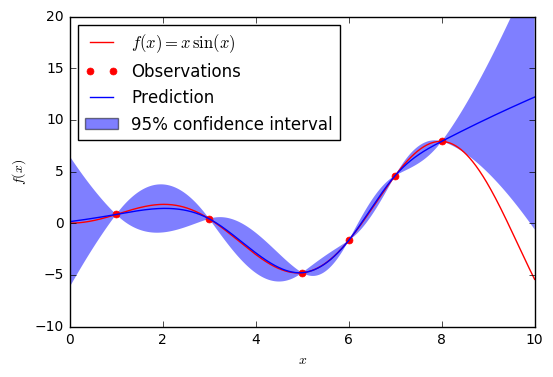

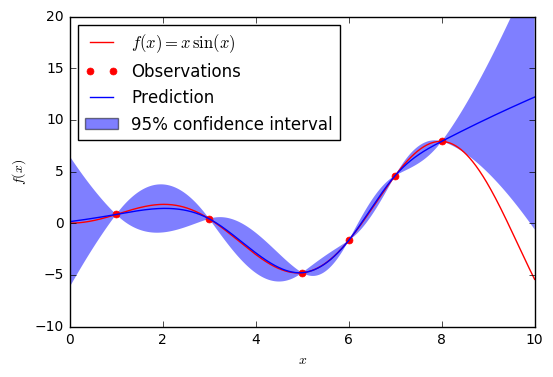

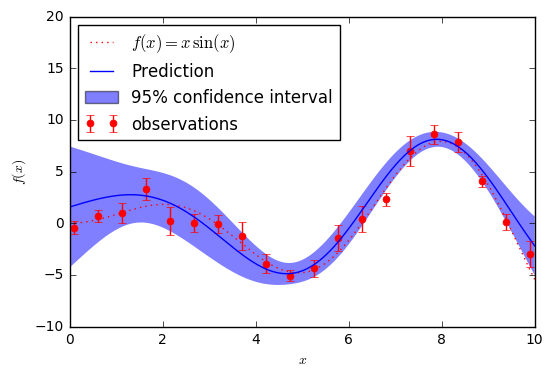

In [2]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
from matplotlib import pyplot as plt

np.random.seed(2016)

# the function to be fitted by the gaussian regression
def f(x):
    return x*np.sin(x)

X = np.atleast_2d([1.,3.,5.,6.,7.,8.]).T
y = f(X).ravel()
x = np.atleast_2d(np.linspace(0,10,1000)).T

gp = GaussianProcess(corr='cubic',theta0=0.01,thetaL=0.0001,thetaU=1e-1,random_start=100)
gp.fit(X,y)
y_pred,MSE = gp.predict(x,eval_MSE=True)
sigma = np.sqrt(MSE)

plt.close()
fig = plt.figure()
# plot the true function
plt.plot(x,f(x),'r',label='$f(x)=x\,\sin(x)$')
plt.plot(X,y,'r.',markersize=10,label='Observations')
plt.plot(x,y_pred,'b-',label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10,20)
plt.legend(loc='upper left')

#--------------------------
# now the noisy case

X = np.linspace(0.1,9.9,20)
#print(len(X))
X = np.atleast_2d(X).T
#print(len(X))
y = f(X).ravel()
dy = 0.5 + 1.0*np.random.random(y.shape)
noise = np.random.normal(0,dy)
y+= noise

x = np.atleast_2d(np.linspace(0,10,1000)).T
gp = GaussianProcess(corr='squared_exponential',theta0=1e-1,
                    thetaL=1e-3,thetaU=1,nugget=dy/y**2,random_start=100)
gp.fit(X,y)
y_pred,MSE = gp.predict(x,eval_MSE=True)
sigma = np.sqrt(MSE)

fig = plt.figure()
plt.plot(x,f(x),'r:',label='$f(x)=x\,\sin(x)$')
plt.errorbar(X.ravel(),y,dy,fmt='r.',markersize=10,label='observations')
plt.plot(x,y_pred,'b-',label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10,20)
plt.legend(loc='upper left')
plt.show()


The 1992, computer experiment chapter in the bandbook of statistics provided a really really good and thorough introduction to this topic. Pretty much everything we are using now is well covered, including the exchangeablility between derivative and expectation. But how these tools are applied in the machine learning community is still not so clear to me.